<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación de onda. Método explícito**

Tenemos el problema hiperbólico

$$ \frac{\partial^2 u}{\partial t^2}(x,t) - 4 \frac{\partial^2 u}{\partial x^2}(x,t) = 0 \quad 0<x<1, \quad 0<t $$

con condiciones de frontera: $$ u(0,t)=0 = u(1,t) = 0, \quad para \quad 0<t $$

y condiciones iniciales:
$$ u(x,0) = f(x) = \sin(\pi x),  \quad  0 \leq x \leq 1$$
$$ \frac{\partial u}{\partial t}(x,0)= g(x) = 0,  \quad  0 \leq x \leq 1 $$

Usando $h = 0.1$ y $k = 0.05$, vamos a comparar los resultados con la solución exacta:
$$ u(x,t) = sen(\pi x) cos(2 \pi t)$$

<br>

Como $c^2 = 4$, entonces $c = 2$.

En este caso, usamos el método explícito centrado visto en clase, con la ecuación en diferencias finitas de la ecuación de onda obtenida:

$$ u_{i, j+1} = 2(1-r^2)u_{i, j} - u_{i, j-1} + r^2(u_{i+1, j} + u_{i-1, j}) $$

con $i=1,...,N$  y $j=1,...,N_t-1$

donde:
$$ r = \frac{c\,k}{h} $$


In [ ]:
# Importamos librerías

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Para mostrar gráficos dentro de nuestra notebook:
%matplotlib inline

Usando $h = 0.1$ (paso en x) y $k = 0.05$ (paso en t  )

vamos a obtener
$$ r = \frac{c k}{h} $$

con $ r \leq 1 $, que es la condición de estabilidad del método explícito.

In [ ]:
# Parámetros:
c = 2  # velocidad de la onda
h = 0.1  # paso de espacio
k = 0.05  # paso de tiempo

# Para construir la malla:
x = np.arange(0, 1 + h, h)
t = np.arange(0, 1 + k, k)

Nx = len(x)
Nt = len(t)

r = c * k / h
print("r =", r)

r = 1.0


21

## Inicialización del método

Recordemos que la ecuación de onda requiere:

Valores en `t = 0` → condición inicial u(x,0)

Valores en `t = k` → obtenidos con expansión de Taylor:

$$ u(x,k) = u(x,0) + k\,g(x) + \frac{k^2}{2}c^2 u_{xx}(x,0) $$

donde $g(x)=0$ y $ u(x,0) = \sin(\pi x) $


In [ ]:
# Ponemos un arreglo donde guardaremos la solución:
u = np.zeros((Nt, Nx))

# Ponemos la condición inicial u(x,0) = sin(pi x)
u[0,:] = np.sin(np.pi * x)

# Usando la fórmula de Taylor:
for j in range(1, Nx-1):
    u_xx = (u[0,j+1] - 2*u[0,j] + u[0,j-1]) / h**2
    u[1,j] = u[0,j] + 0 + (k**2)*c**2 * u_xx / 2


Usamos la ecuación:
$$ u_{i, j+1} = 2(1-r^2)u_{i, j} - u_{i, j-1} + r^2(u_{i+1, j} + u_{i-1, j}) $$


para $j = 1, …, Nx-2$

In [ ]:
for n in range(1, Nt-1):
    for j in range(1, Nx-1):
        u[n+1, j] = (
            2*(1-r**2)*u[n,j]
            - u[n-1,j]
            + r**2*(u[n,j+1] + u[n,j-1])
        )

    # Las condiciones de frontera:
    u[n+1, 0] = 0
    u[n+1, -1] = 0

Ahora, tenemos que la solución exacta es:
$$ u(x,t) = \sin(\pi x)\cos(2\pi t) $$

vamos a calcular el error máximo

In [ ]:
# Solución exacta en toda la malla
u_exact = np.zeros_like(u)
for n, tn in enumerate(t):
    u_exact[n,:] = np.sin(np.pi*x) * np.cos(2*np.pi*tn)

# Cálculo de errores
error = np.abs(u - u_exact)
L2 = np.linalg.norm(error)
max_err = np.max(error)

print("Error L2 =", L2)
print("Error máximo =", max_err)

Error L2 = 2.480723645069842e-15
Error máximo = 6.661338147750939e-16


Para ver la comparación de la solución exacta y la solución analítica gráficamente, hagamos las curvas para:

- t = 0
- t = 0.25
- t = 0.5
- t = 0.75
- t = 1

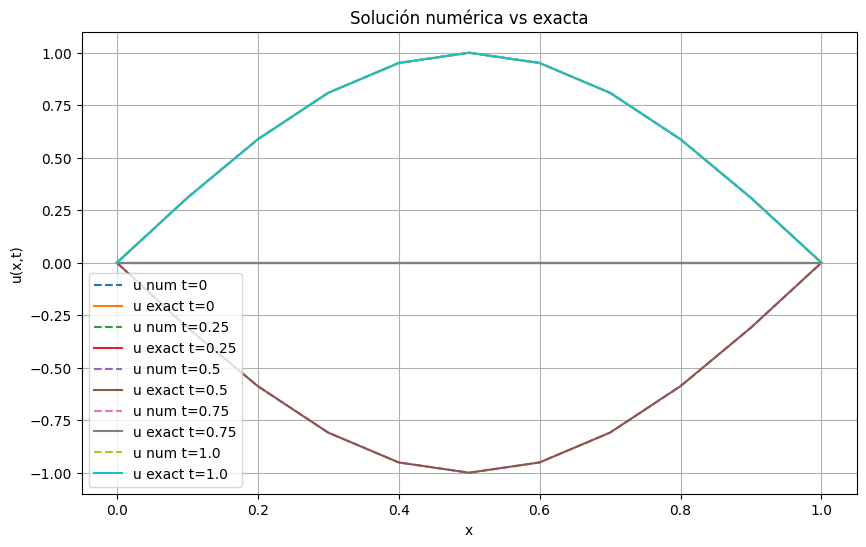

In [ ]:
plt.figure(figsize=(10,6))

tiempos = [0, 0.25, 0.5, 0.75, 1.0]

for T in tiempos:
    n = int(T/k)
    plt.plot(x, u[n], '--', label=f'u num t={T}')
    plt.plot(x, u_exact[n], label=f'u exact t={T}')

plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solución numérica vs exacta")
plt.legend()
plt.grid()
plt.show()


Creamos ahora una animación para ver cómo evoluciona solución